In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load and preprocess the data
import pandas as pd

file_path = 'data/bsmax_0_1'
df = pd.read_csv(file_path, delimiter='\t')

# Define the features (X) and the target (y)
X = df.drop(columns=['rtn', 'ymd'])  # Drop the target and date columns
y = df['rtn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

# Example of making new predictions
new_data = pd.DataFrame({
    'init': [190000],
    'avg': [192000],
    'dev': [1000],
    'bkmax': [10],
    'skmax': [11],
    'bomega': [0.001],
    'somega': [-0.001],
    'bpri': [-0.3],
    'bfor': [3500],
    'bmom': [400],
    'bc': [10],
    'bpmax': [300],
    'bmax': [22],
    'bmomn': [10],
    'bcn': [0.05],
    'bpmaxn': [1300],
    'bmaxn': [0],
    'spri': [-0.3],
    'sfor': [3500],
    'smom': [400],
    'sc': [10],
    'spmax': [300],
    'smax': [22],
    'smomn': [10],
    'scn': [0.05],
    'spmaxn': [1300],
    'smaxn': [0]
})

new_prediction = model.predict(new_data)
print(f"New prediction: {new_prediction}")


Mean Absolute Error (MAE): 1707.6989692982456
Mean Squared Error (MSE): 9451101.595230483
R-squared (R2) Score: 0.46973232258094333
New prediction: [512.31]


Mean Absolute Error (MAE): 1707.6989692982456
Mean Squared Error (MSE): 9451101.595230483
R-squared (R2) Score: 0.46973232258094333


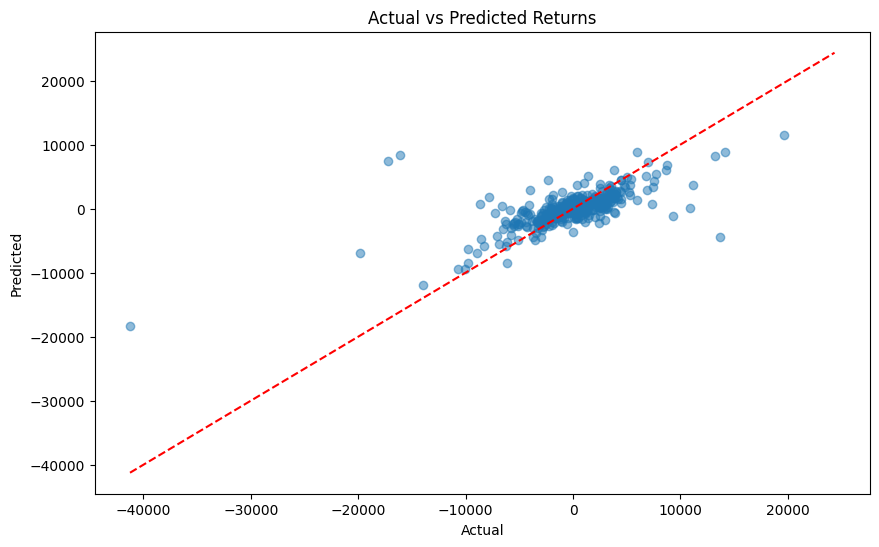

In [3]:
import matplotlib.pyplot as plt
# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Returns')
plt.show()